In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\day5_assign_machine_failure_dataset - day5_assign_machine_failure_dataset.csv")

In [5]:
df

,Temperature,Vibration,Power_Usage,Humidity,Machine_Type,Failure_Risk
0,74.967142,56.996777,8.649643,20.460962,Mill,1
1,68.617357,54.623168,9.710963,25.698075,Lathe,0
2,76.476885,50.298152,8.415160,27.931972,Drill,1
3,85.230299,46.765316,9.384077,39.438438,Lathe,1
4,67.658466,53.491117,6.212771,32.782766,Drill,1
...,...,...,...,...,...,...
995,67.188997,55.350751,10.154961,30.142288,Lathe,1
996,87.976865,49.867394,10.515505,19.610941,Drill,0
997,76.408429,45.590627,7.516479,28.398511,Mill,0
998,64.288210,49.184665,10.668353,38.216891,Mill,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   1000 non-null   float64
 1   Vibration     1000 non-null   float64
 2   Power_Usage   1000 non-null   float64
 3   Humidity      1000 non-null   float64
 4   Machine_Type  1000 non-null   object 
 5   Failure_Risk  1000 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB


In [3]:
num_features = df.drop(columns=['Machine_Type','Failure_Risk'],axis=1).columns.to_list()
# cat_features = df.select_dtypes(include=[np.object_]).columns.to_list()

In [4]:
cat_features = df[['Machine_Type']]

In [68]:
cat_features

,Machine_Type
0,Mill
1,Lathe
2,Drill
3,Lathe
4,Drill
...,...
995,Lathe
996,Drill
997,Mill
998,Mill


In [5]:
encoder = LabelEncoder() 
cat_encoded = pd.DataFrame(encoder.fit_transform(cat_features)) 
cat_encoded.columns = ['Machine_Type'] 

c:\Users\User\Desktop\test\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
cat_encoded

,Machine_Type
0,2
1,1
2,0
3,1
4,0
...,...
995,1
996,0
997,2
998,2


In [6]:
scaler = StandardScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(df[num_features]), columns=num_features) 
num_scaled

,Temperature,Vibration,Power_Usage,Humidity
0,0.487759,1.332576,-0.692816,-1.840107
1,-0.161022,0.856405,-0.152959,-0.819843
2,0.642015,-0.011240,-0.812090,-0.384647
3,1.536382,-0.719965,-0.319235,1.856976
4,-0.258995,0.629303,-1.932372,0.560356
...,...,...,...,...
995,-0.306963,1.002366,0.072888,0.045954
996,1.817009,-0.097655,0.256285,-2.005703
997,0.635020,-0.955620,-1.269219,-0.293759
998,-0.603347,-0.234617,0.334033,1.619001


In [7]:
target = df['Failure_Risk']


In [8]:
# df_num_scaled = pd.DataFrame(num_scaled, columns=[f'num_scaled_{i}' for i in range(num_scaled.shape[1])])
# df_cat_features = pd.DataFrame(cat_features, columns=['cat_feature_0']) 

final_df = pd.concat([num_scaled, cat_encoded, target], axis=1)

In [9]:
final_df

,Temperature,Vibration,Power_Usage,Humidity,Machine_Type,Failure_Risk
0,0.487759,1.332576,-0.692816,-1.840107,2,1
1,-0.161022,0.856405,-0.152959,-0.819843,1,0
2,0.642015,-0.011240,-0.812090,-0.384647,0,1
3,1.536382,-0.719965,-0.319235,1.856976,1,1
4,-0.258995,0.629303,-1.932372,0.560356,0,1
...,...,...,...,...,...,...
995,-0.306963,1.002366,0.072888,0.045954,1,1
996,1.817009,-0.097655,0.256285,-2.005703,0,0
997,0.635020,-0.955620,-1.269219,-0.293759,2,0
998,-0.603347,-0.234617,0.334033,1.619001,2,1


In [10]:
x = final_df.drop(columns=['Failure_Risk','Machine_Type'],axis=1) 
y = final_df['Failure_Risk']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.15)

In [14]:
k = 10
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

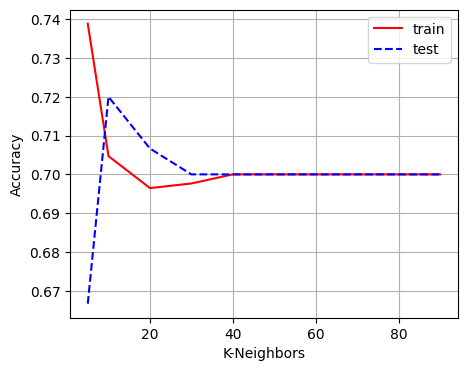

In [12]:
acc_train = []
acc_test = []
n_neighbors = [5,10,20,30,40,50,60,70,80,90] #1 - 10 len(y)
for k in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    acc_train.append(model.score(x_train, y_train))
    acc_test.append(model.score(x_test, y_test))
    
plt.figure(figsize=(5, 4))
plt.plot(n_neighbors, acc_train, 'r-', label='train')
plt.plot(n_neighbors, acc_test, 'b--', label='test')
plt.xlabel('K-Neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='best')
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score

In [16]:
y_pred = model.predict(x_test)

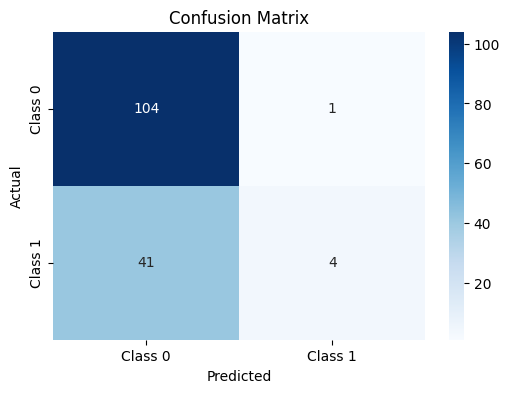

In [17]:
cfmx = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cfmx, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

# Customize the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
print("<<<<< Model Evaluation Matrix >>>>>")
print('Accuracy:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision:', '{:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall:', '{:.2f}'.format(recall_score(y_test, y_pred)))
print('F1 Score:', '{:.2f}'.format(f1_score(y_test, y_pred)))
err = (cfmx[0, 1] + cfmx[1, 0]) / y_test.count()
print('Error Rate', '{:.2f}'.format(err))
print()
print("<<<<< Classification Report >>>>>")
print()
print(classification_report(y_test, y_pred))

<<<<< Model Evaluation Matrix >>>>>
Accuracy: 0.72
Precision: 0.80
Recall: 0.09
F1 Score: 0.16
Error Rate 0.28

<<<<< Classification Report >>>>>

              precision    recall  f1-score   support

           0       0.72      0.99      0.83       105
           1       0.80      0.09      0.16        45

    accuracy                           0.72       150
   macro avg       0.76      0.54      0.50       150
weighted avg       0.74      0.72      0.63       150

